# Task 1: Movies Recommender System

The first part of the IBM capstone project focuses on creating a system that recommends to a user movies according to his preferrences. This kind of systems are being used by famous companies such that NetFlix. 
At the beginning i explain step by step the procedure to convert my original dataset into a new converted one that will be systematically used for the remaining task. Also, i provide a new unlabeled test data set which contains two movies. The goal is to show the top 20 movies that are similar to them.     

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# 1) Extract and load dataset into a pandas dataframe

In [2]:
df = pd.read_csv('original data/movies.csv')
df.head(5)

,Id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
def count(df):
    return len(df.values)
count(df)

9810

# 2) Create new dataset

In [4]:
# This is a method to obtain all the titles and store them into a list

def titles(data):
    titles = []
    for i in range(len(data.values)):
        get = data['title'].iloc[i].split(' ')
        title = ''
        if len(get) > 1:
            for index in range(len(get)):
                title = title + ' ' + get[index]
        titles.append(title)
    return titles
titles = titles(df)

In [5]:
# This is a method to obtain all the different genres and store them into a list

def genres(data):
    genres = []
    for i in range(len(data.values)):
        get = data['genres'].iloc[i].split('|')
        for element in get:
            if element not in genres:
                genres.append(element)
    return genres
genres = genres(df)
genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir']

In [6]:
def foundOrNot(data, category):
    column = []
    for i in range(len(data.values)):
        if category in data['genres'].iloc[i]:
            column.append(1)
        else:
            column.append(0)
    return column

action = foundOrNot(df, 'Action')
drama = foundOrNot(df, 'Drama')
adventure = foundOrNot(df, 'Adventure')
science_fiction = foundOrNot(df, 'Sci-Fi')
fantasy = foundOrNot(df, 'Fantasy')
comedy = foundOrNot(df, 'Comedy')
romance = foundOrNot(df, 'Romance')
thriller = foundOrNot(df, 'Thriller')
crime = foundOrNot(df, 'Crime')
war = foundOrNot(df, 'War')
mystery = foundOrNot(df, 'Mystery')
animation = foundOrNot(df, 'Animation')
children = foundOrNot(df, 'Children')
horror = foundOrNot(df, 'Horror')
musical = foundOrNot(df, 'Musical')
documentary = foundOrNot(df, 'Documentary')
i_max = foundOrNot(df, 'IMAX')
western = foundOrNot(df, 'Western')
film = foundOrNot(df, 'Film-Noir')

In [7]:
# create random ratings for each movie

ratings = []
for i in range(len(df.values)):
    ratings.append(round(random.uniform(0.0,10.0),1))

In [8]:
# obtain a special category for each movie based on its rating 

categories = []
for i in range(len(ratings)):
    if ratings[i] >= 0.0 and ratings[i] < 2.5:
        categories.append(0)
    elif ratings[i] >= 2.5 and ratings[i] < 5.0:
        categories.append(1)
    elif ratings[i] >= 5.0 and ratings[i] < 7.5:
        categories.append(2)
    else:
        categories.append(3)
        
# 0 stands for the worst movies
# 1 stands for bad movies
# 2 stands for good movies
# 3 stands for the best movies

In [9]:
# the new dataset will have as its columns all the genres separately, the ratings and the categories

dictionary = {'Id': df['Id'],
              'Title': titles,
              'Action': action,
              'Drama': drama,
              'Adventure': adventure,
              'Sci-Fi': science_fiction,
              'Fantasy': fantasy,
              'Comedy': comedy,
              'Romance': romance,
              'Thriller': thriller,
              'Crime': crime,
              'War': war,
              'Mystery': mystery,
              'Animation': animation,
              'Children': children,
              'Horror': horror,
              'Musical': musical,
              'Documentary': documentary,
              'IMAX': i_max,
              'Western': western,
              'Film-Noir': film,
              'Ratings': ratings,
              'Label': categories}
converted = pd.DataFrame(dictionary)
converted.head(5)

,Id,Title,Action,Drama,Adventure,Sci-Fi,Fantasy,Comedy,Romance,Thriller,...,Animation,Children,Horror,Musical,Documentary,IMAX,Western,Film-Noir,Ratings,Label
0,1,Toy Story (1995),0,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,2.0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,4.1,1
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,4.8,1
3,4,Waiting to Exhale (1995),0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,2.6,1
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8.6,3


In [10]:
# create a csv file for this dataset in my computer

converted.to_csv('converted data/movies-converted.csv', header=True, index=False)

# 3) Explore features

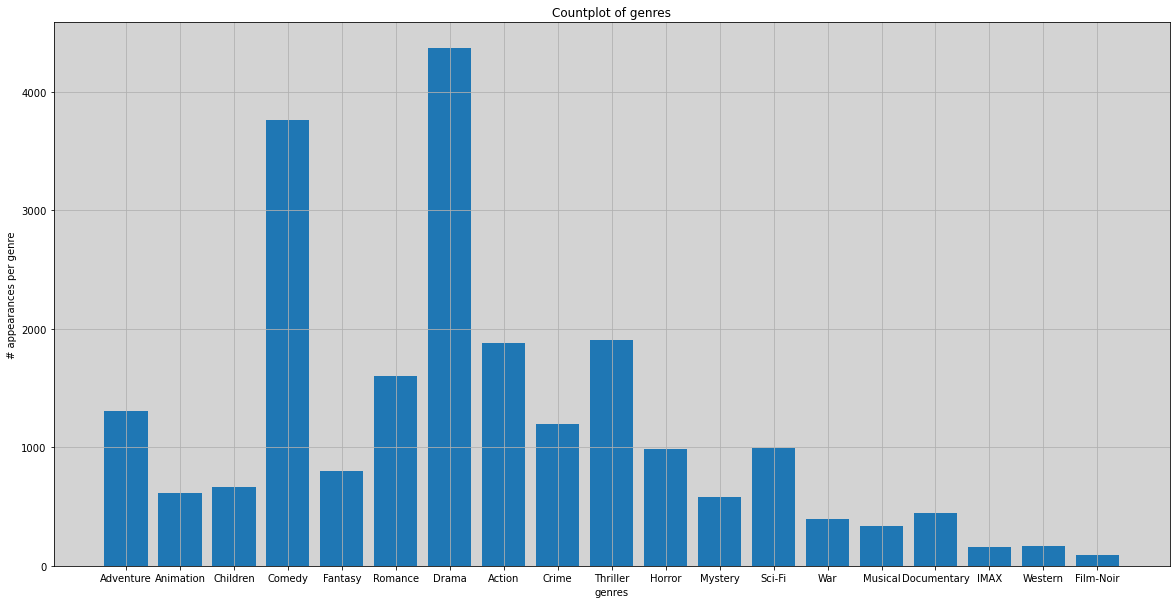

In [11]:
# find the total number of appearances of each genre

genre_appearances = []
for column in genres:
    new = converted[converted[column] == 1]
    genre_appearances.append(len(new.values))
    
# draw a countplot of genres

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set(facecolor='lightgray')
plt.bar(genres, genre_appearances)
plt.xlabel('genres')
plt.ylabel('# appearances per genre')
plt.grid(True)
plt.title('Countplot of genres')
plt.show()

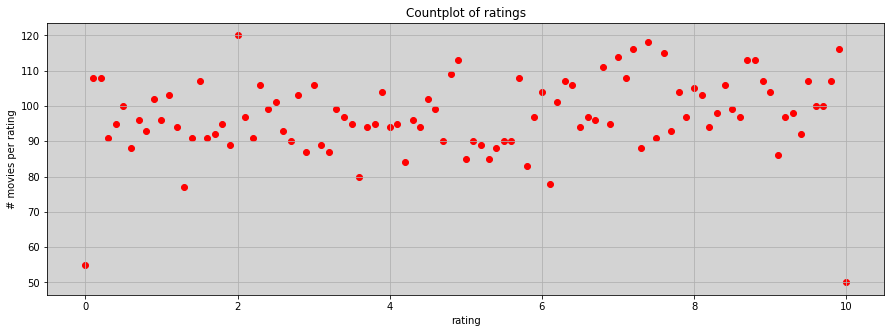

In [12]:
# draw a countplot to see how many movies have a specific rating

keep_ratings = []
keep_titles = []
number = 0.0
while number <= 10.0:
    keep_ratings.append(number)
    imdb = converted[converted['Ratings'] == number]   
    keep_titles.append(len(imdb.values))
    number = round(number + 0.1,1)
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set(facecolor='lightgray')
plt.scatter(keep_ratings,keep_titles,c='r')
plt.xlabel('rating')
plt.ylabel('# movies per rating')
plt.grid(True)
plt.title('Countplot of ratings')
plt.show()

# 4) Extract and load test dataset into a pandas dataframe

In [13]:
unseen_data = pd.read_csv('movies-unseen.csv')
unseen_data

,Id,Title,Action,Drama,Adventure,Sci-Fi,Fantasy,Comedy,Romance,Thriller,...,Mystery,Animation,Children,Horror,Musical,Documentary,IMAX,Western,Film-Noir,Ratings
0,1,The Incredible Hulk (2008),1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7.3
1,2,Shutter Island (2010),0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,8.2


# 5) Find the similar movies

In [14]:
# this is a method to obtain four different dictionaries
# 1. create a dictionary to store all the horizontal vectors of train set
# 2. create a dictionary to store the actual titles
# 3. create a dictionary to store the ratings of each movie
# note that, for convenience, the above three dictionaries use the same keys
# 4. create a dictionary to store all the horizontal vectors of test set

def function(train, test):
    # drop the unecessary columns
    x = train.drop(['Id', 'Title', 'Ratings', 'Label'], axis=1)
    y = test.drop(['Id', 'Title', 'Ratings'], axis=1)
    x_new = ''
    y_new = ''
    for column in x.columns:
        x[column] = x[column].astype(str)
        x_new = x_new + ' ' + x[column]
    for column in y.columns:
        y[column] = y[column].astype(str)
        y_new = y_new + ' ' + y[column]
    train['Vector'] = x_new
    test['Vector'] = y_new
    #initialize a dictionary to store the vectors of train set
    dictionary = {}
    # initialize a dictionary to store the titles
    normal_dictionary = {}
    ratings = {}
    count = 1
    for i in range(len(train.values)):
        temporary = []
        for element in train['Vector'].iloc[i].split(' '):
            temporary.append(element)
        # the first element of temporary is an empty string
        temporary.pop(0)
        dictionary['m{}'.format(str(count))] = temporary
        normal_dictionary['m{}'.format(str(count))] = train['Title'].iloc[i]
        ratings['m{}'.format(str(count))] = train['Ratings'].iloc[i]
        count += 1
    #initialize a dictionary to store the vectors of test set
    dictionary_new = {}
    count = 1
    for i in range(len(test.values)):
        temporary = []
        for element in test['Vector'].iloc[i].split(' '):
            temporary.append(element)
        temporary.pop(0)
        dictionary_new['n{}'.format(str(count))] = temporary
        count += 1
    return ratings, normal_dictionary, dictionary, dictionary_new
imdb_ratings, normal_train, set_train, set_test = function(converted, unseen_data)

In [15]:
converted = converted.drop(['Vector'],1)
unseen_data = unseen_data.drop(['Vector'],1)

Assume that A, B are two sets. Then the jaccard similarity is obtained by the following equation

# $$Jaccard(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

In [16]:
# this method follows the above equation

def jaccard_similarity(ratings, normal, train, test):
    # initialize two lists: one for similar movies with thresold 0.95 and one for their actual ratings
    storage = []
    store_ratings = []
    thresold = 0.95
    for key_test in test.keys():
        for key_train in train.keys():
            m = len(test[key_test])
            n = len(train[key_train])
            a = 0
            b = 0
            if m == n:
                for i in range(m):
                    if test[key_test][i] == train[key_train][i]:
                        a += 1
                    b += 1
                result = round(a/b, 3)
                if result >= thresold:
                    storage.append(normal[key_train])
                    store_ratings.append(ratings[key_train])
    return storage, store_ratings
same, ratings_same = jaccard_similarity(imdb_ratings, normal_train, set_train, set_test)

In [17]:
# sort the titles on descending order according to their ratings by using selection sort algorithm

i = 0
while i <= len(ratings_same)-2:
    maximum = i
    j = i+1
    while j <= len(ratings_same)-1:
        if ratings_same[maximum] < ratings_same[j]:
            maximum = j
        j += 1
    ratings_same[maximum], ratings_same[i] = ratings_same[i], ratings_same[maximum]
    same[maximum], same[i] = same[i], same[maximum]
    i += 1

In [18]:
# recommend only the top 20 movies 

recommended_movies = pd.DataFrame({'recommended': same, 'IMDB': ratings_same})
recommended_movies.head(20)

,recommended,IMDB
0,Witness for the Prosecution (1957),9.9
1,"Client, The (1994)",9.4
2,Missing (1982),9.1
3,"Village, The (2004)",8.8
4,"Good German, The (2006)",8.6
5,"Da Vinci Code, The (2006)",8.5
6,I'm Not Scared (Io non ho paura) (2003),7.9
7,All Good Things (2010),7.9
8,True Story (2015),7.8
9,Sleuth (2007),7.7


## Task 2: Model training with Apache Spark

In this task, i train three different models to make them familiar with the classes. I find the performance of each model separately by calculating the accuracy, the precision and the recall. The one with the best results will be the one to make the predictions on the new unseen movies. 

## 1) Load pandas dataframe 'converted' into a spark dataframe

In [19]:
import findspark
findspark.init()

In [20]:
import pyspark 
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [21]:
from pyspark.sql.types import *

c = list(converted.columns)

schema = StructType([StructField(c[0], IntegerType(), True),
                     StructField(c[1], StringType(), True),
                     StructField(c[2], IntegerType(), True),
                     StructField(c[3], IntegerType(), True),
                     StructField(c[4], IntegerType(), True),
                     StructField(c[5], IntegerType(), True),
                     StructField(c[6], IntegerType(), True),
                     StructField(c[7], IntegerType(), True),
                     StructField(c[8], IntegerType(), True),
                     StructField(c[9], IntegerType(), True),
                     StructField(c[10], IntegerType(), True),
                     StructField(c[11], IntegerType(), True),
                     StructField(c[12], IntegerType(), True),
                     StructField(c[13], IntegerType(), True),
                     StructField(c[14], IntegerType(), True),
                     StructField(c[15], IntegerType(), True),
                     StructField(c[16], IntegerType(), True),
                     StructField(c[17], IntegerType(), True),
                     StructField(c[18], IntegerType(), True),
                     StructField(c[19], IntegerType(), True),
                     StructField(c[20], IntegerType(), True),
                     StructField(c[21], FloatType(), True),
                     StructField(c[22], IntegerType(), True)])

movies = spark.createDataFrame(converted, schema)

In [22]:
movies.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Action: integer (nullable = true)
 |-- Drama: integer (nullable = true)
 |-- Adventure: integer (nullable = true)
 |-- Sci-Fi: integer (nullable = true)
 |-- Fantasy: integer (nullable = true)
 |-- Comedy: integer (nullable = true)
 |-- Romance: integer (nullable = true)
 |-- Thriller: integer (nullable = true)
 |-- Crime: integer (nullable = true)
 |-- War: integer (nullable = true)
 |-- Mystery: integer (nullable = true)
 |-- Animation: integer (nullable = true)
 |-- Children: integer (nullable = true)
 |-- Horror: integer (nullable = true)
 |-- Musical: integer (nullable = true)
 |-- Documentary: integer (nullable = true)
 |-- IMAX: integer (nullable = true)
 |-- Western: integer (nullable = true)
 |-- Film-Noir: integer (nullable = true)
 |-- Ratings: float (nullable = true)
 |-- Label: integer (nullable = true)



In [23]:
movies.show(5)

+---+--------------------+------+-----+---------+------+-------+------+-------+--------+-----+---+-------+---------+--------+------+-------+-----------+----+-------+---------+-------+-----+
| Id|               Title|Action|Drama|Adventure|Sci-Fi|Fantasy|Comedy|Romance|Thriller|Crime|War|Mystery|Animation|Children|Horror|Musical|Documentary|IMAX|Western|Film-Noir|Ratings|Label|
+---+--------------------+------+-----+---------+------+-------+------+-------+--------+-----+---+-------+---------+--------+------+-------+-----------+----+-------+---------+-------+-----+
|  1|    Toy Story (1995)|     0|    0|        1|     0|      1|     1|      0|       0|    0|  0|      0|        1|       1|     0|      0|          0|   0|      0|        0|    2.0|    0|
|  2|      Jumanji (1995)|     0|    0|        1|     0|      1|     0|      0|       0|    0|  0|      0|        0|       1|     0|      0|          0|   0|      0|        0|    4.1|    1|
|  3| Grumpier Old Men...|     0|    0|        0| 

## 2) Vector transformation of feature set

In [24]:
from pyspark.ml.feature import VectorAssembler

required_features = ['Ratings']
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(movies)
transformed_data.show(5)

+---+--------------------+------+-----+---------+------+-------+------+-------+--------+-----+---+-------+---------+--------+------+-------+-----------+----+-------+---------+-------+-----+--------------------+
| Id|               Title|Action|Drama|Adventure|Sci-Fi|Fantasy|Comedy|Romance|Thriller|Crime|War|Mystery|Animation|Children|Horror|Musical|Documentary|IMAX|Western|Film-Noir|Ratings|Label|            features|
+---+--------------------+------+-----+---------+------+-------+------+-------+--------+-----+---+-------+---------+--------+------+-------+-----------+----+-------+---------+-------+-----+--------------------+
|  1|    Toy Story (1995)|     0|    0|        1|     0|      1|     1|      0|       0|    0|  0|      0|        1|       1|     0|      0|          0|   0|      0|        0|    2.0|    0|               [2.0]|
|  2|      Jumanji (1995)|     0|    0|        1|     0|      1|     0|      0|       0|    0|  0|      0|        0|       1|     0|      0|          0|   0

## 3) Data spliting

In [25]:
# split the data into training and test set

(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [26]:
str(training_data.count())

'7845'

In [27]:
str(test_data.count())

'1965'

## 4) Train the models

Random forest, decision tree and logistic regression classifiers are going to be used for the training. 

In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Random Forest Classifier

In [29]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='Label',featuresCol='features')
rfModel = rf.fit(training_data)
rf_predictions = rfModel.transform(test_data)

multi_evaluator_rf_accuracy = MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy')
multi_evaluator_rf_precision = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedPrecision')
multi_evaluator_rf_recall = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedRecall')

print('Random Forest classifier Accuracy:', round(multi_evaluator_rf_accuracy.evaluate(rf_predictions),6))
print('Random Forest classifier Precision:', round(multi_evaluator_rf_precision.evaluate(rf_predictions),6))
print('Random Forest classifier Recall:', round(multi_evaluator_rf_recall.evaluate(rf_predictions),6))

Random Forest classifier Accuracy: 0.96743
Random Forest classifier Precision: 0.968364
Random Forest classifier Recall: 0.96743


## Logistic Regression Classifier

In [30]:
from pyspark.ml.classification import LogisticRegression
                                                                                
lr = LogisticRegression(featuresCol='features',labelCol='Label')
lrModel = lr.fit(training_data)
lr_predictions = lrModel.transform(test_data)
                               
multi_evaluator_lr_accuracy = MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy')
multi_evaluator_lr_precision = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedPrecision')
multi_evaluator_lr_recall = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedRecall')
                                                            
print('Logistic Regression classifier Accuracy:', round(multi_evaluator_lr_accuracy.evaluate(lr_predictions),6))
print('Logistic Regression classifier Precision:', round(multi_evaluator_lr_precision.evaluate(lr_predictions),6))
print('Logistic Regression classifier Recall:', round(multi_evaluator_lr_recall.evaluate(lr_predictions),6))

Logistic Regression classifier Accuracy: 1.0
Logistic Regression classifier Precision: 1.0
Logistic Regression classifier Recall: 1.0


## Decision Tree Classifier

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol='features',labelCol='Label')
dtModel = dt.fit(training_data)
dt_predictions = dtModel.transform(test_data)

multi_evaluator_dt_accuracy = MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy')
multi_evaluator_dt_precision = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedPrecision')
multi_evaluator_dt_recall = MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedRecall')

print('Decision Tree classifier Accuracy:', round(multi_evaluator_dt_accuracy.evaluate(dt_predictions),6))
print('Decision Tree classifier Precision:', round(multi_evaluator_dt_precision.evaluate(dt_predictions),6))
print('Decision Tree classifier Recall:', round(multi_evaluator_dt_recall.evaluate(dt_predictions),6))

Decision Tree classifier Accuracy: 0.96743
Decision Tree classifier Precision: 0.968364
Decision Tree classifier Recall: 0.96743


## Conclusion

The logistic regression classifier has the best results. This model is going to make predictions on new unseen data.